In [1]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [2]:
# load doc into memory
def load_corpus(filename):
    # open the file as read only
    file = open(filename,'r')
    # read all text
    text = file.read().split('\n')
    # close the file
    file.close()
    return text

In [3]:
new_test = load_corpus('/Users/tcbon/Desktop/Coding/Metis/Bootcamp/Project_4/Christianity - Bible/clean_new_testament.txt')

In [4]:
old_test = load_corpus('/Users/tcbon/Desktop/Coding/Metis/Bootcamp/Project_4/Christianity - Bible/clean_old_testament.txt')

In [5]:
quran = load_corpus('/Users/tcbon/Desktop/Coding/Metis/Bootcamp/Project_4/Islam - Quran/clean_quran.txt')

In [7]:
def sentiment_parser(corpus):
    total_sentiment = []
    for line in corpus:
        line_sent=TextBlob(line).sentiment.polarity
        total_sentiment.append(line_sent)
    return total_sentiment

In [8]:
def subjectivity_parser(corpus):
    total_sentiment = []
    for line in corpus:
        line_sent=TextBlob(line).sentiment.subjectivity
        total_sentiment.append(line_sent)
    return total_sentiment

In [9]:
old_test_sentiment = sentiment_parser(old_test)

In [10]:
new_test_sentiment = sentiment_parser(new_test)

In [11]:
quran_sentiment = sentiment_parser(quran)

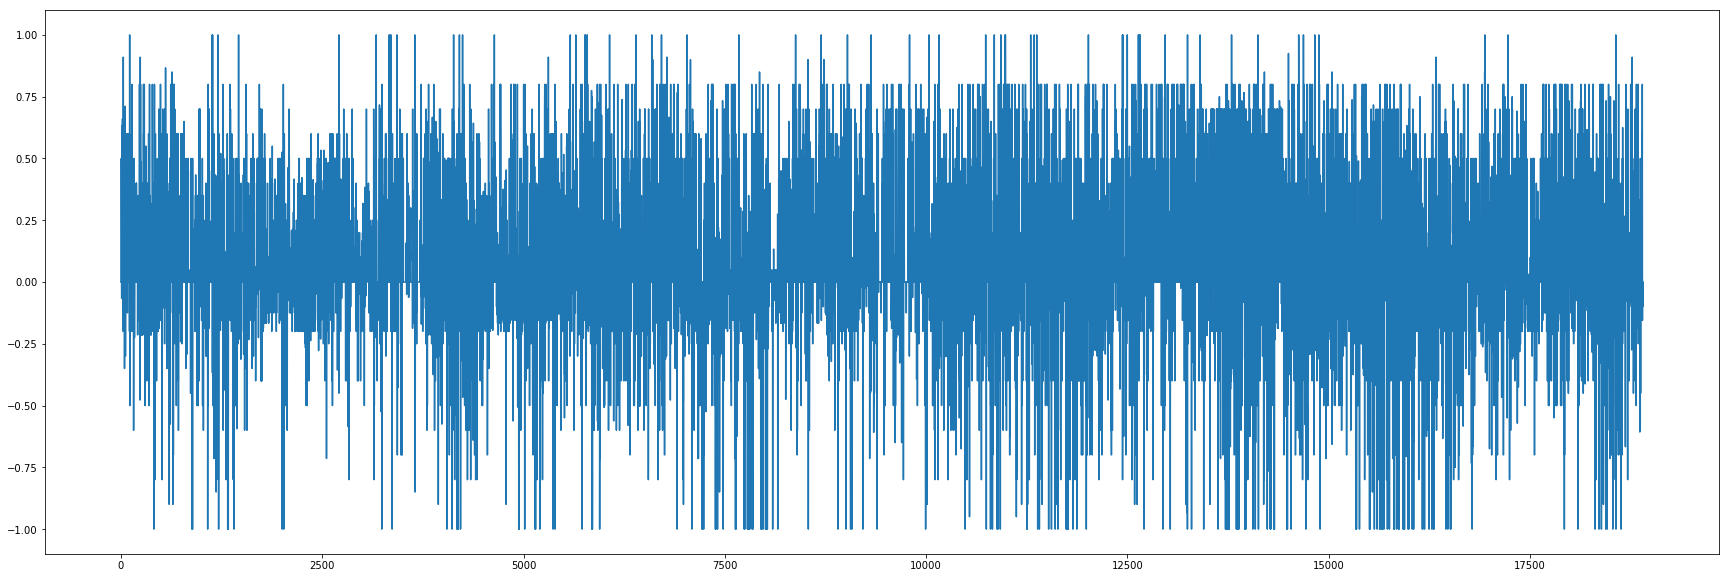

In [13]:
#  Sentiment over old test
old_test_verse_num = [x for x in range(len(old_test_sentiment))]

plt.figure(figsize=(30,10))
plt.plot(old_test_verse_num,old_test_sentiment);

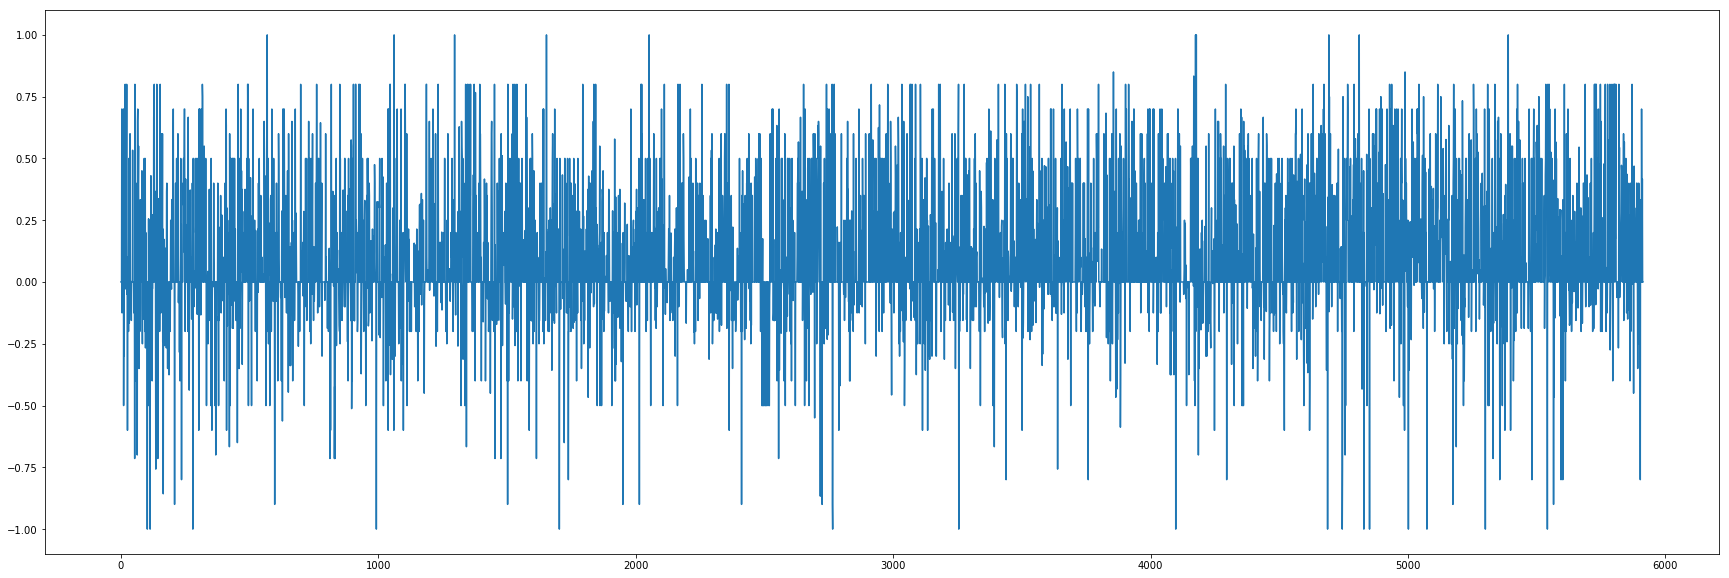

In [14]:
#  Sentiment over new test
new_test_verse_num = [x for x in range(len(new_test_sentiment))]

plt.figure(figsize=(30,10))
plt.plot(new_test_verse_num,new_test_sentiment);

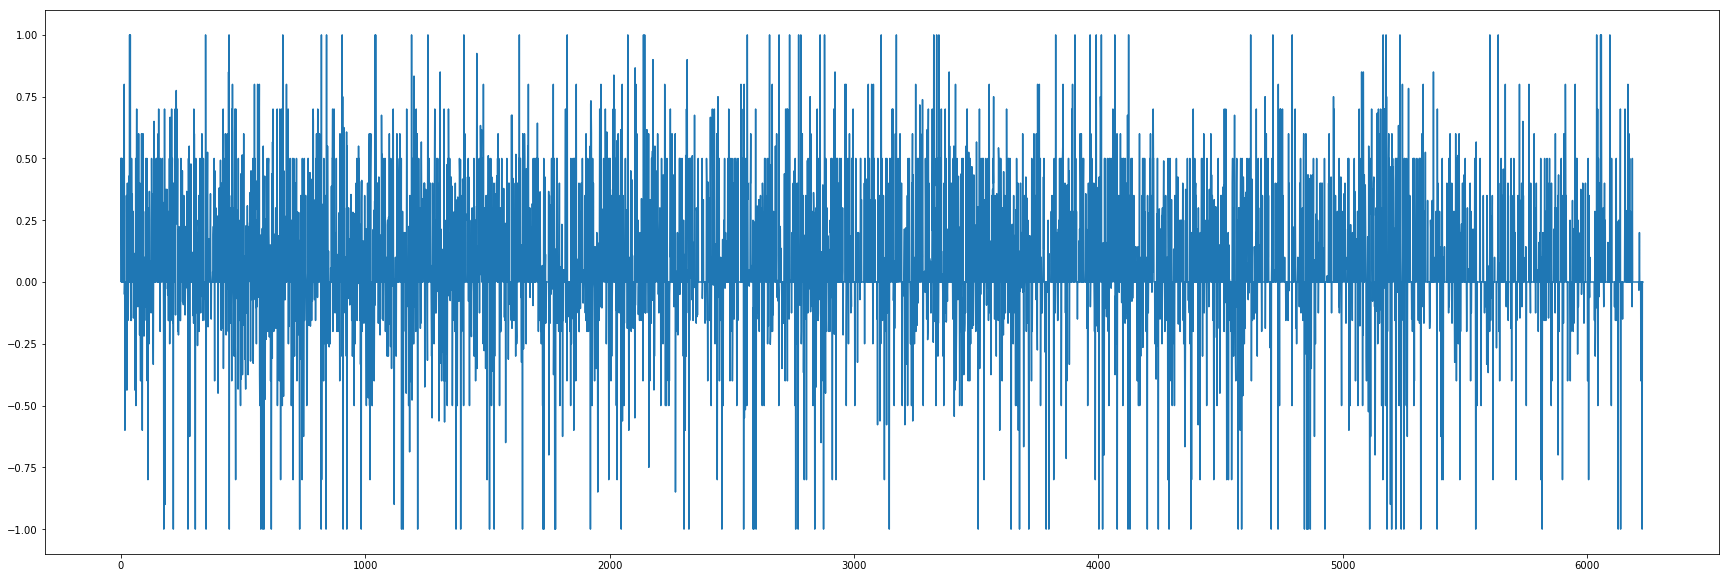

In [15]:
#  Sentiment over new test
quran_verse_num = [x for x in range(len(quran_sentiment))]

plt.figure(figsize=(30,10))
plt.plot(quran_verse_num,quran_sentiment);

In [16]:
bad_df = pd.DataFrame(new_test)

bad_df['sentiment'] = bad_df[0].apply(lambda verse: TextBlob(verse).sentiment.polarity)
bad_df['subjectivity'] = bad_df[0].apply(lambda verse: TextBlob(verse).sentiment.subjectivity)

In [17]:
bad_df.sort_values(by='sentiment')

,0,sentiment,subjectivity
3255,but the unbelieving jews stirred up the gentil...,-1.000000,1.000000
5542,if there come any unto you and bring not this ...,-1.000000,1.000000
5002,and the lord shall deliver me from every evil ...,-1.000000,1.000000
2765,i pray not that thou shouldest take them out o...,-1.000000,1.000000
279,but he answered and said unto them an evil and...,-1.000000,1.000000
5074,so i sware in my wrath they shall not enter in...,-1.000000,1.000000
4829,abstain from all appearance of evil,-1.000000,1.000000
4098,now these things were our examples to the inte...,-1.000000,1.000000
992,for from within out of the heart of men procee...,-1.000000,1.000000
102,and lead us not into temptation but deliver us...,-1.000000,1.000000


In [18]:
very_bad_df = bad_df[bad_df.sentiment == -1]

In [19]:
very_bad_df.rename(columns={0:'verse'},inplace=True)

/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [20]:
list(very_bad_df['verse'])

['and lead us not into temptation but deliver us from evil for thine is the kingdom and the power and the glory for ever amen',
 'take therefore no thought for the morrow for the morrow shall take thought for the things of itself sufficient unto the day is the evil thereof',
 'but he answered and said unto them an evil and adulterous generation seeketh after a sign and there shall no sign be given to it but the sign of the prophet jonas for as jonas was three days and three nights in the whales belly so shall the son of man be three days and three nights in the heart of the earth',
 'for from within out of the heart of men proceed evil thoughts adulteries fornications murders thefts covetousness wickedness deceit lasciviousness an evil eye blasphemy pride foolishness all these evil things come from within and defile the man',
 'and forgive us our sins for we also forgive every one that is indebted to us and lead us not into temptation but deliver us from evil',
 'i pray not that thou s

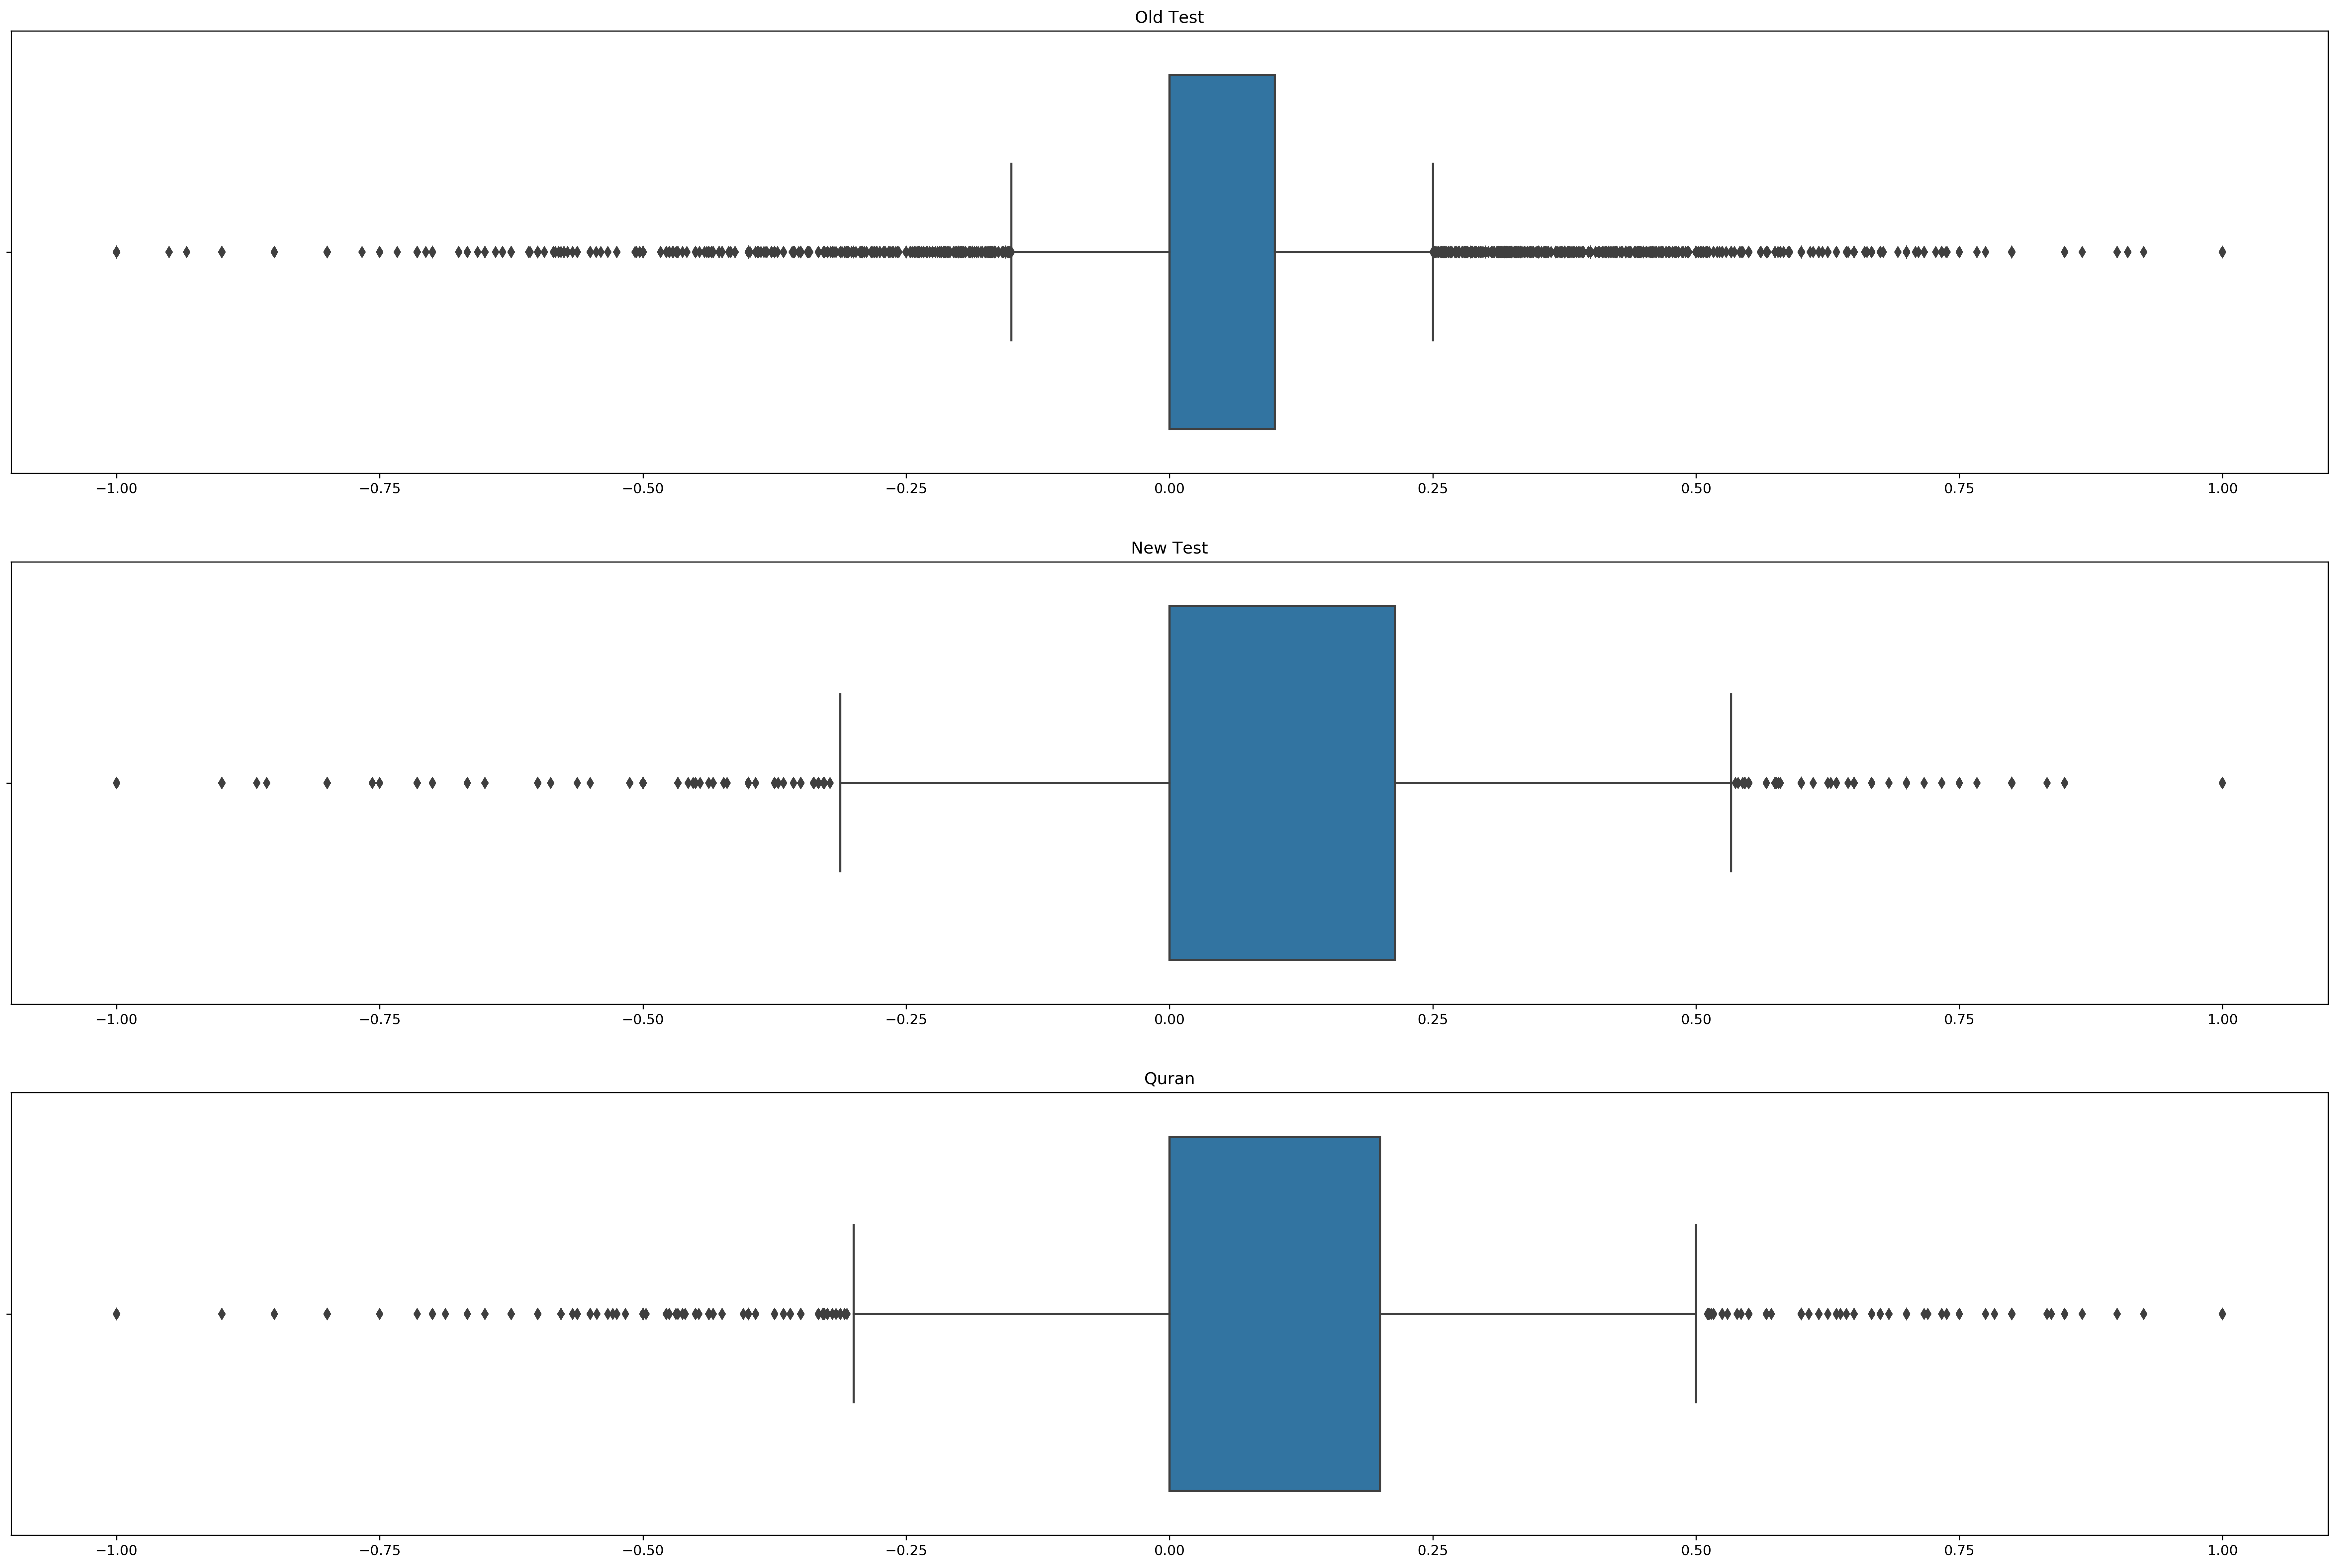

In [96]:
plt.figure(figsize=(30,20),dpi=300)

plt.subplot(311)
plt.title('Old Test')
sns.boxplot(old_test_sentiment)
plt.subplot(312)
plt.title('New Test')
sns.boxplot(new_test_sentiment)
plt.subplot(313)
plt.title('Quran')
sns.boxplot(quran_sentiment)

In [100]:
pd.Series(old_test_sentiment).describe()

count    18904.000000
mean         0.053219
std          0.275345
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.100000
max          1.000000
dtype: float64

In [59]:
pd.Series(new_test_sentiment).describe()

count    5914.000000
mean        0.094623
std         0.271161
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.214286
max         1.000000
dtype: float64

In [71]:
pd.Series(quran_sentiment).describe()

count    6229.000000
mean        0.068516
std         0.293374
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.200000
max         1.000000
dtype: float64

In [114]:
q = pd.Series(quran_sentiment)

i = q[q<(-.9)].index

In [115]:
for num in i: 
    print(quran[num])

he commands you what is evil and shameful and that ye should say of allah that of which ye have no knowledge
ye who believe enter into islam wholeheartedly and follow not the footsteps of the evil one for he is to you an avowed enemy
evil one threatens you with poverty and bids you to conduct unseemly allah promiseth you his forgiveness and bounties and allah careth for all and he knoweth all things
to those who reject faith soon will ye be vanquished and gathered together to hellan evil bed indeed to lie on
to those who reject faith i will punish them with terrible agony in this world and in the hereafter nor will they have anyone to help
shall we cast terror into the hearts of the unbelievers for that they joined companions with allah for which he had sent no authority their abode will be the fire and evil is the home of the wrongdoers
who obeys the messenger obeys allah but if any turn away we have not sent thee to watch over their evil deeds
should ye be divided into two parties ab

### Sentiment over time

In [21]:
def sentiment_splits(corpus,n_splits):
    # Splitting corpus into parts
    corpus_parts = []
    length = (len(corpus)//n_splits)
    for i in range(1,n_splits+1):
        if i == n_splits:
            corpus_parts.append(corpus[length*(i-1):])
        else:
            corpus_parts.append(corpus[length*(i-1):length*i])
    
    # Finding sentiment of each part
    sent_avg = []
    for part in corpus_parts:
        sent_avg.append(np.array(sentiment_parser(part)).mean())
        
    return sent_avg

In [22]:
old_test_sent_over_time = sentiment_splits(old_test,10)

In [23]:
new_test_sent_over_time = sentiment_splits(new_test,10)

In [24]:
quran_sent_over_time = sentiment_splits(quran,10)

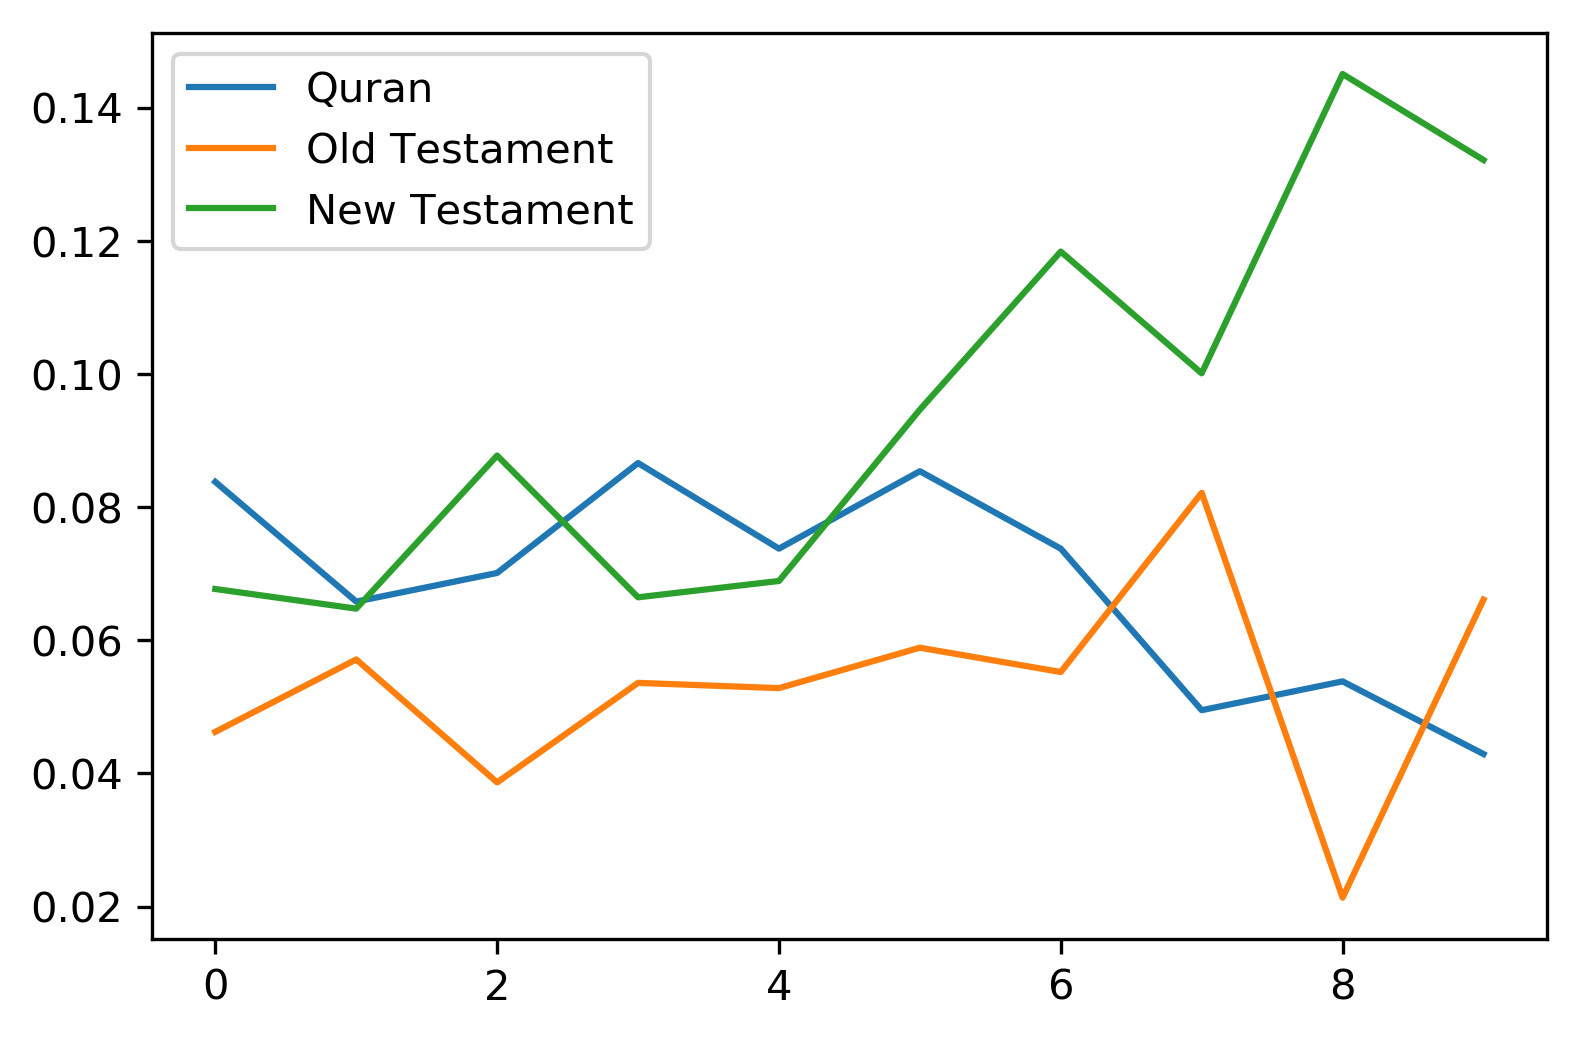

In [25]:
#  Sentiment over quran test
plt.figure(dpi=300)

# plt.subplot(311)
quran_sent_num = [x for x in range(len(quran_sent_over_time))]
plt.plot(quran_sent_num,quran_sent_over_time,label='Quran')

# plt.subplot(312)
old_test_sent_num = [x for x in range(len(old_test_sent_over_time))]
plt.plot(old_test_sent_num,old_test_sent_over_time,label='Old Testament')

# plt.subplot(313)
new_test_sent_num = [x for x in range(len(new_test_sent_over_time))]
plt.plot(new_test_sent_num,new_test_sent_over_time,label='New Testament')

plt.legend();

### Vader Sentiment Analysis:

In [41]:
def vader_sentiment_parser(corpus):
    analyzer = SentimentIntensityAnalyzer()
    total_sentiment = []
    for line in corpus:
        line_sent=analyzer.polarity_scores(line)['pos']
        total_sentiment.append(line_sent)
    return total_sentiment

In [42]:
def vader_sentiment_splits(corpus,n_splits):
    # Splitting corpus into parts
    corpus_parts = []
    length = (len(corpus)//n_splits)
    for i in range(1,n_splits+1):
        if i == n_splits:
            corpus_parts.append(corpus[length*(i-1):])
        else:
            corpus_parts.append(corpus[length*(i-1):length*i])
    
    # Finding sentiment of each part
    sent_avg = []
    for part in corpus_parts:
        sent_avg.append(np.array(vader_sentiment_parser(part)).mean())
        
    return sent_avg

In [43]:
new_test_vader_sent_over_time = vader_sentiment_splits(new_test,10)

In [44]:
old_test_vader_sent_over_time = vader_sentiment_splits(old_test,10)

In [45]:
quran_vader_sent_over_time = vader_sentiment_splits(quran,10)

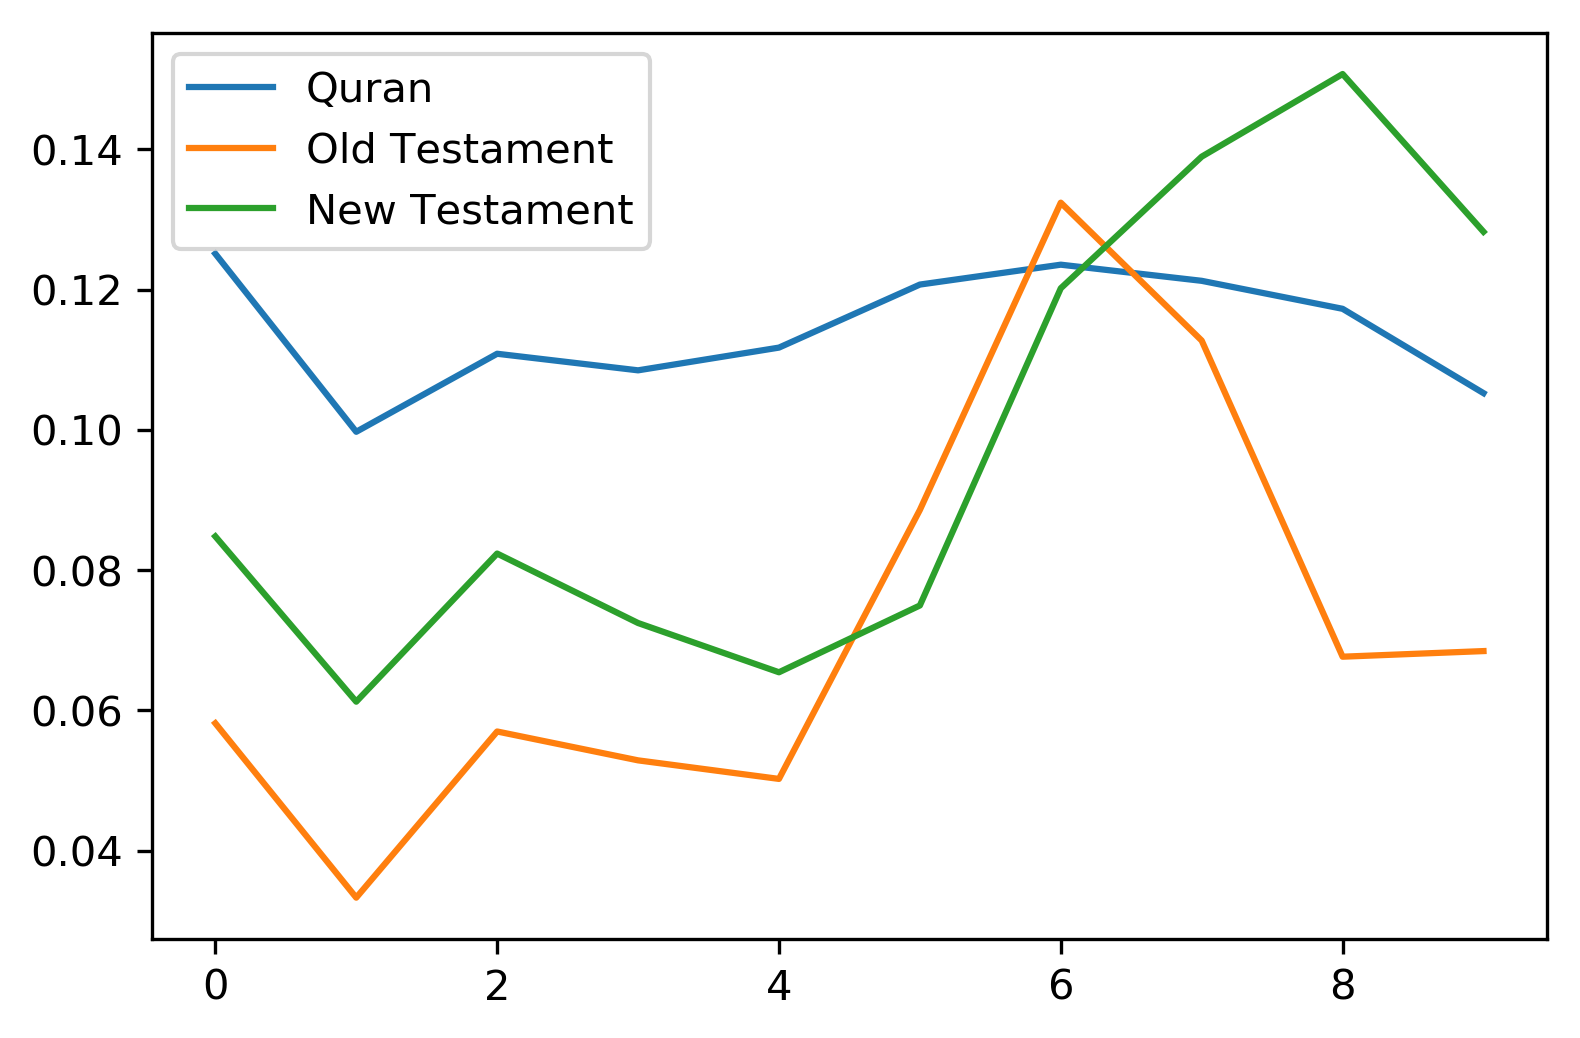

In [47]:
#  Sentiment over quran test
plt.figure(dpi=300)

# plt.subplot(311)
quran_vader_sent_num = [x for x in range(len(quran_vader_sent_over_time))]
plt.plot(quran_vader_sent_num,quran_vader_sent_over_time,label='Quran')

# plt.subplot(312)
old_test_vader_sent_num = [x for x in range(len(old_test_vader_sent_over_time))]
plt.plot(old_test_vader_sent_num,old_test_vader_sent_over_time,label='Old Testament')

# plt.subplot(313)
new_test_vader_sent_num = [x for x in range(len(new_test_vader_sent_over_time))]
plt.plot(new_test_vader_sent_num,new_test_vader_sent_over_time,label='New Testament')

plt.legend();

### Number of times violence is referenced

In [48]:
def violent_counter(corpus):
    violent_count = 0
    for verse in corpus:
        split_verse = verse.split()
        for word in split_verse:
            if word in ['kill','murder','death','blood']:
                violent_count += 1
    return violent_count

In [49]:
print(violent_counter(quran)/len(quran))
print(violent_counter(old_test)/len(old_test))
print(violent_counter(new_test)/len(new_test))

0.01573286241772355
0.03501904358865848
0.04920527561717957
